In [ ]:
##########################################
# DEVELOPMENT LENGTH FOR DEFORMED BARS
##########################################

def bendandhook_deformedbars(barsize, angle):
    """
    NSCP 2015 SECTION 425 REINFORCEMENT DETAILS
    Table 425.3.1 Standard Hook Geometry for Development of Deformed Bars in Tension

    Parameters:
    barsize: The diameter of the reinforcing bar (10-25, 28-36, 40-50).
    angle: The hook angle in degrees (90 or 180).

    Returns:
    dict: A dictionary containing:
        - 'bend': Minimum inside bend diameter.
        - 'lext': Straight extension length.
    
    Raises:
    ValueError: If the bar size or hook angle is invalid.
    """
    
    if 10 <= barsize <= 25:
        bend = 6 * barsize
    elif 28 <= barsize <= 36:
        bend = 8 * barsize
    elif 40 <= barsize <= 50:
        bend = 10 * barsize
    else:
        return f"Invalid bar size for {angle}-degree hook."

    if angle == 90:
        lext = 12 * barsize
    elif angle == 180:
        lext = max(4 * barsize, 65)
    else:
        return "Invalid hook angle provided."

    result = {
        "bend diameter": bend,
        "lext": lext,
    }
    
    return result

# MAIN EXECUTION

if __name__ == "__main__":
    barsize = 25  # valid range: 10-25, 28-36, 40-50
    angle = 180   # valid values: 90 or 180
    results = bendandhook_deformedbars(barsize, angle)
    bend = results["bend diameter"]
    lext = results["lext"]
    print("bend diameter:", bend)
    print("lext:", lext)
    print(bendandhook_deformedbars(barsize, angle))

bend diameter: 150
lext: 100
{'bend diameter': 150, 'lext': 100}


In [ ]:
################################################
# LEXT AND BEND DIAMETER FOR STIRRUPS TIES HOOPS
################################################

def bendandhook_stirrupstieshoops(barsize, angle):
    """
    NSCP 2015 SECTION 425 REINFORCEMENT DETAILS
    Table 425.3.2 Minimum Inside Bend Diameters and Standard Hook Geometry for Stirrups, Ties, and Hoops

    Parameters:
    barsize: The diameter of the reinforcing bar (10 through 25).
    angle: The hook angle in degrees (90, 135, or 180).

    Returns:
    dict: A dictionary containing:
        - 'bend': Minimum inside bend diameter.
        - 'lext': Straight extension length.
    
    Raises:
    ValueError: If the bar size or hook angle is invalid.
    """
    
    if 10 <= barsize <= 16:
        bend = 4 * barsize
    elif 20 <= barsize <= 25:
        bend = 6 * barsize
    else:
        return f"Invalid bar size for {angle}-degree hook."

    if angle == 90:
        lext = max(6 * barsize, 75) if barsize <= 16 else 12 * barsize
    elif angle == 135:
        lext = max(6 * barsize, 75)
    elif angle == 180:
        lext = max(4 * barsize, 65)
    else:
        return "Invalid hook angle provided."

    result = {
        "bend diameter": bend,
        "lext": lext,
    }
    
    return result

# MAIN EXECUTION

if __name__ == "__main__":
    barsize = 25  # valid range: 10-16, 20-25
    angle = 180   # valid values: 90, 135, or 180
    results = bendandhook_stirrupstieshoops(barsize, angle)
    bend = results["bend diameter"]
    lext = results["lext"]
    print("bend diameter:", bend)
    print("lext:", lext)
    print(bendandhook_stirrupstieshoops(barsize, angle))

bend diameter: 150
lext: 100
{'bend diameter': 150, 'lext': 100}


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


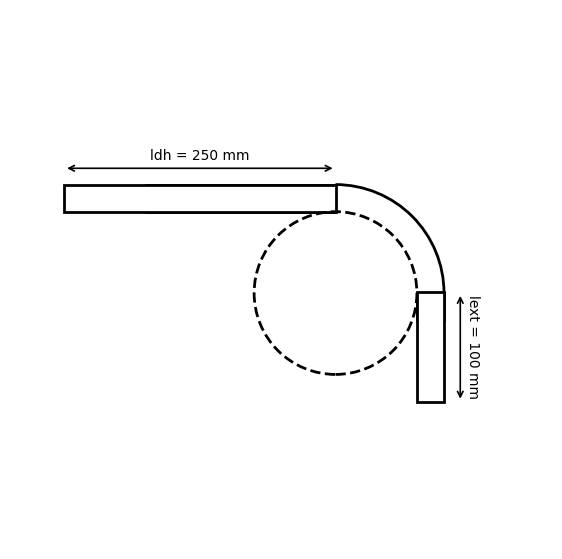

In [17]:
### FOR 90 DEGREE BEND

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def final_plot(ldh, lext, bend, barsize):

    # 1) Circle geometry
    r = bend / 2.0
    circle_center = (ldh - r, -r)  # e.g. (75, -75) if ldh=150, bend=150

    # 2) Offset radius for the arc
    offset_r = r + barsize  # e.g. 75 + 25 = 100

    fig, ax = plt.subplots(figsize=(7,7))

    # 3) Draw bars (zorder=1)
    horiz_bar = patches.Rectangle(
        (0, 0),
        ldh,
        barsize,
        facecolor='none',
        edgecolor='black',
        linewidth=2,
        zorder=1
    )
    ax.add_patch(horiz_bar)

    vert_bar = patches.Rectangle(
        (ldh, -lext),
        barsize,
        lext,
        facecolor='none',
        edgecolor='black',
        linewidth=2,
        zorder=1
    )
    ax.add_patch(vert_bar)

    # 4) Highlight rectangles for "ldh" and "lext" (zorder=1)
    
    # a) Horizontal highlight
    highlight_ldh_box = patches.Rectangle(
        ((ldh - r) - ldh, 0),
        ldh,
        barsize,
        fill=True,                # Now filled
        facecolor='white',        # White face to hide lines underneath
        edgecolor='black',
        linewidth=2,
        zorder=2.5               # Must exceed the bars' zorder=1
    )
    ax.add_patch(highlight_ldh_box)
    
    # b) Vertical highlight
    highlight_lext_box = patches.Rectangle(
        (ldh, (-r) - lext),
        barsize,
        lext + 1,
        fill=True,                # Now filled
        facecolor='white',
        edgecolor='black',
        linewidth=2,
        zorder=2.5
    )
    ax.add_patch(highlight_lext_box)

    # 5) White wedge to hide bar/rectangle lines outside circle in quadrant 0..90
    #    NOTE the higher zorder so it covers everything behind it
    wedge = patches.Wedge(
        center=circle_center,
        r=9999,  # large radius to cover everything in that quadrant
        theta1=0,
        theta2=90,
        facecolor='white',
        edgecolor='none',
        zorder=2  # must be > bars' zorder to hide them
    )
    ax.add_patch(wedge)

    # 6) Full circle (zorder=3)
    full_circle = patches.Circle(
        circle_center,
        radius=r,
        facecolor='none',
        edgecolor='black',
        linestyle='dashed',
        linewidth=2,
        zorder=3
    )
    ax.add_patch(full_circle)

    # 7) Offset arc in the top-right quadrant (zorder=4)
    offset_arc = patches.Arc(
        circle_center,
        width=2*offset_r,
        height=2*offset_r,
        angle=0,
        theta1=0,
        theta2=90,
        color='black',
        linewidth=2,
        zorder=4
    )
    ax.add_patch(offset_arc)

    # 8) Dimension lines (zorder=10)
    arrowprops = dict(arrowstyle='<->', linewidth=1.2)

    # a) ldh: from the "red point" leftward
    #    Red point = (ldh - r, 0) => (75,0) for ldh=150,bend=150
    red_pt = (ldh - r, 0)

    # Move dimension line ABOVE the bar
    dim_y = barsize + 15  # e.g. if barsize=25, this is 40
    left_arrow_x = red_pt[0] - ldh

    # Draw the arrow
    ax.annotate(
        '',
        xy=(red_pt[0], dim_y),       # right tip
        xytext=(left_arrow_x, dim_y),# left tip
        arrowprops=arrowprops,
        zorder=10
    )

    # Label near the midpoint
    ax.text(
        (red_pt[0] + left_arrow_x)/2, dim_y + 5,
        f'ldh = {ldh} mm',
        ha='center',
        va='bottom',
        zorder=10
    )

    # b) lext: from the "yellow point" downward
    #    Yellow point = (ldh, -r) => (150, -75)
    yellow_pt = (ldh, -r)

    # Shift dimension line farther right so it's more visible
    dim_x = ldh + barsize + 15  # e.g. 150 + 25 + 15 = 190
    ax.annotate(
        '',
        xy=(dim_x, yellow_pt[1]),
        xytext=(dim_x, yellow_pt[1] - lext),
        arrowprops=arrowprops,
        zorder=10
    )
    ax.text(
        dim_x + 5, yellow_pt[1] - lext/2,
        f'lext = {lext} mm',
        rotation=270,
        ha='left',
        va='center',
        zorder=10
    )

    # 9) Final plot settings
    ax.set_aspect('equal', 'datalim')
    pad = 50
    x_min = left_arrow_x - pad
    x_max = ldh + barsize + pad + 50
    y_min = -lext - pad - 50
    y_max = barsize + pad
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.axis('off')
    plt.show()

##################
# PLOT EXECUTION
##################
if __name__ == "__main__":
    
    barsize = 25
    angle = 180
    
    """ uncomment which data you want to use/plot """
    # results = bendandhook_deformedbars(barsize, angle)
    results = bendandhook_stirrupstieshoops(barsize, angle)
    bend = results["bend diameter"]
    lext = results["lext"]
    ldh = lext + bend
    
    final_plot(ldh, lext, bend, barsize)